In [2]:
#60180520 박선진
import datetime
from scipy import stats
import io
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import numpy as np
import seaborn as sns

In [3]:
humidity_jinju = pd.read_csv("humidity_jinju.csv")
#humidity_jinju = humidity_jinju.loc[humidity_jinju['humidity'] == "0.0", 'humidity'] = "nan"
#humidity_jinju = humidity_jinju.fillna(humidity_jinju.mean())
humidity_jinju

,Unnamed: 0,date,humidity
0,0,2016-01-01,69.4
1,1,2016-02-01,43.9
2,2,2016-03-01,44.0
3,3,2016-04-01,57.3
4,4,2016-05-01,61.5
...,...,...,...
2227,2227,2021-08-31,84.4
2228,2228,2021-09-31,0.0
2229,2229,2021-10-31,80.4
2230,2230,2021-11-31,0.0


In [4]:
#데이터 불러오기

train = pd.read_csv("train.csv") 
weather_jinju = pd.read_csv ("weather_jinju.csv")
humidity_jinju = pd.read_csv("humidity_jinju.csv")
train.rename(columns={'일자' : 'date'}, inplace=True)
train

,date,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0


In [18]:
#날씨 습도 조인 >> train 조인 
weather = pd.merge(left = weather_jinju , right = humidity_jinju, on = "date", how = 'inner')
train_weather = pd.merge(left = train, right=weather, on="date", how='inner')
train_weather

,date,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,Unnamed: 0_x,avg,max,min,rain,Unnamed: 0_y,humidity
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,31,-0.6,5.0,-4.1,0.0,1,43.9
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,32,-2.3,6.2,-9.1,0.0,13,47.5
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,33,-1.7,7.7,-9.3,0.0,25,57.1
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,34,-0.2,7.7,-7.7,0.0,37,53.4
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,35,1.3,9.6,-6.5,0.0,49,44.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,1846,-0.4,10.6,-9.7,0.0,2088,64.0
900,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,1847,5.2,12.6,-2.6,1.7,2100,77.8
901,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,1848,7.0,9.8,5.1,1.2,2112,97.5
902,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,1851,6.3,14.3,-1.2,0.0,2148,75.8


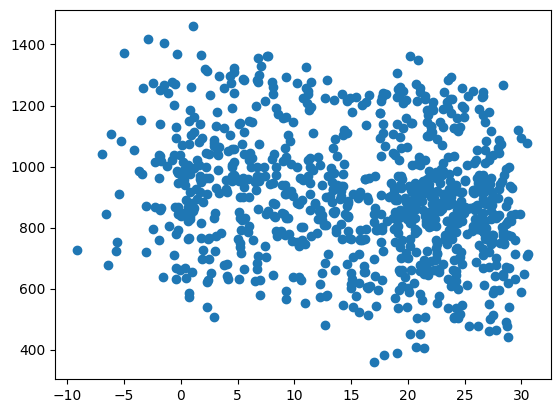

In [19]:
# 하루 평균 온도 중식계 산점도

plt.scatter(train_weather['avg'] ,train_weather["중식계"])

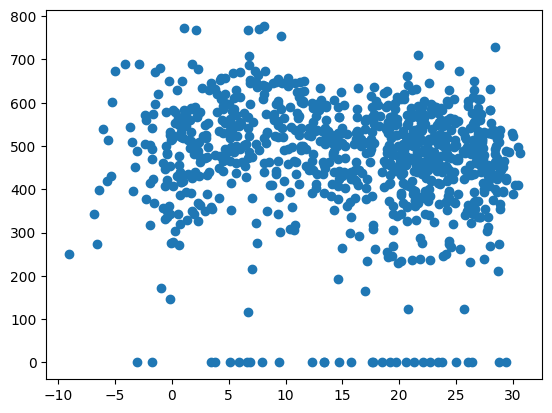

In [20]:
# 하루 평균 온도 석식계 산점도

plt.scatter(train_weather['avg'] ,train_weather["석식계"])

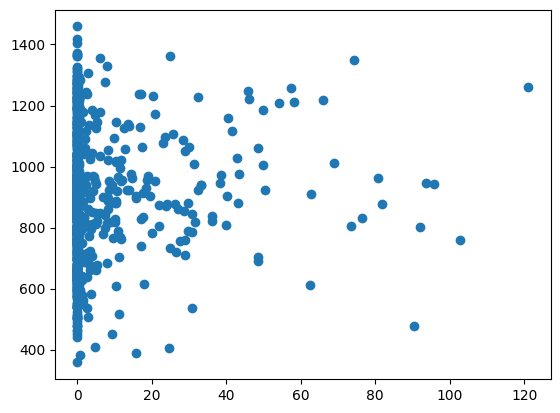

In [21]:
# 비와 중식계 산점도


plt.scatter(train_weather['rain'] ,train_weather["중식계"])

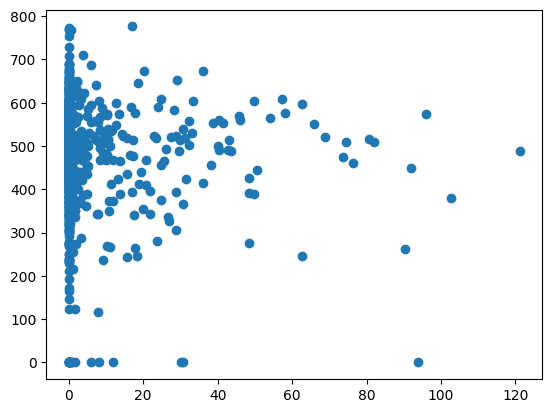

In [22]:
# 비와 석식계 산점도


plt.scatter(train_weather['rain'] ,train_weather["석식계"])

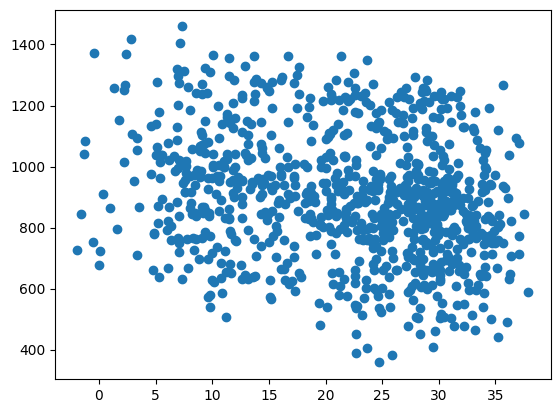

In [23]:
#  최고 기온과 중식계 산점도


plt.scatter(train_weather['max'] ,train_weather["중식계"])

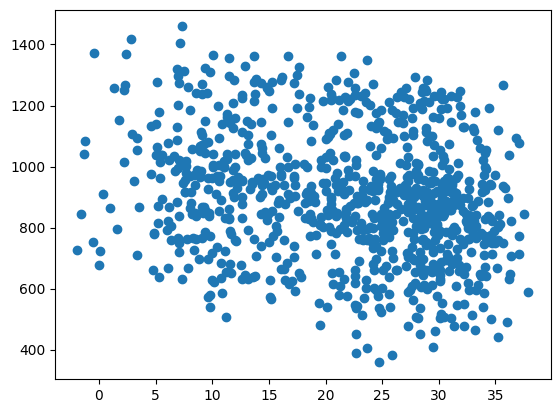

In [24]:
#  최고 기온과 중식계 산점도


plt.scatter(train_weather['max'] ,train_weather["중식계"])

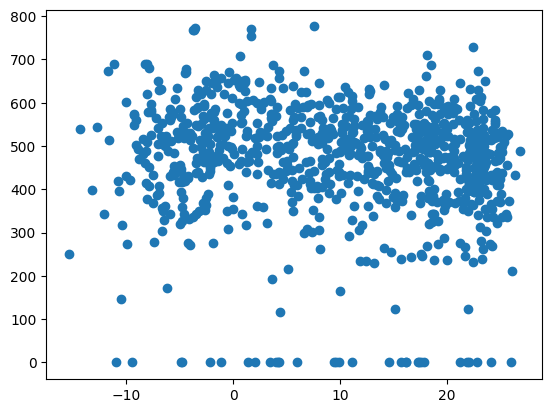

In [25]:
# 최저 기온과 석식계 산점도


plt.scatter(train_weather['min'] ,train_weather["석식계"])

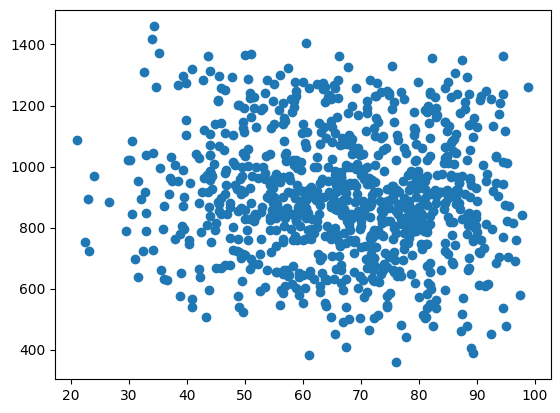

In [26]:
# 습도와 중식계 산점도


plt.scatter(train_weather['humidity'] ,train_weather["중식계"])

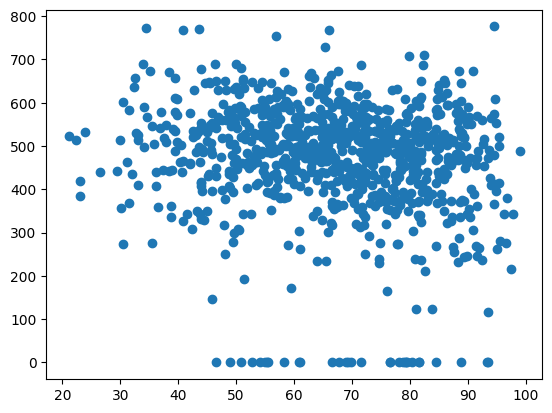

In [27]:
# 습도와 석식계 산점도


plt.scatter(train_weather['humidity'] ,train_weather["석식계"])

In [28]:
#습도와 중식계 사이의 피어슨 상관계수 
#pvalue=0.03 상당히 관련 있을것으로 예상

stats.pearsonr(train_weather['humidity'] ,train_weather["중식계"])

PearsonRResult(statistic=-0.07182232562311193, pvalue=0.030830482032584476)

In [32]:
#습도와 석식계 사이의 피어슨 상관계수 

stats.pearsonr(train_weather['humidity'] ,train_weather["석식계"])

PearsonRResult(statistic=-0.13990055821645836, pvalue=2.429091033976281e-05)

In [29]:
#최고 기온과 중식계 사이의 피어슨 상관계수 

stats.pearsonr(train_weather['max'] ,train_weather["중식계"])

PearsonRResult(statistic=-0.2295256531978825, pvalue=2.8492717577945316e-12)

In [34]:
#최고 기온과 석식계 사이의 피어슨 상관계수 
#pvalue=0.01 상당히 관련 있을것으로 예상
stats.pearsonr(train_weather['max'] ,train_weather["석식계"])

PearsonRResult(statistic=-0.08409650238627493, pvalue=0.01142320956415601)

In [35]:
#평균 기온과 석식계 사이의 피어슨 상관계수 

stats.pearsonr(train_weather['avg'] ,train_weather["중식계"])

PearsonRResult(statistic=-0.20706409049580735, pvalue=3.271407831138917e-10)

In [36]:
#평균 기온과 중식계 사이의 피어슨 상관계수 
#pvalue=0.003 상당히 관련 있을것으로 예상

stats.pearsonr(train_weather['avg'] ,train_weather["석식계"])

PearsonRResult(statistic=-0.09656471902178351, pvalue=0.0036590736714613476)

In [37]:
#최저 기온과 중식계 사이의 피어슨 상관계수

stats.pearsonr(train_weather['min'] ,train_weather["중식계"])

PearsonRResult(statistic=-0.1821717738698263, pvalue=3.4695029734324335e-08)

In [38]:
#최저 기온과 석식계 사이의 피어슨 상관계수
#pvalue=0.001 상당히 관련 있을것으로 예상

stats.pearsonr(train_weather['min'] ,train_weather["석식계"])

PearsonRResult(statistic=-0.10327657237884204, pvalue=0.00187597436698431)

In [39]:
#강수와 중식계 사이의 피어슨 상관계수
#pvalue=0.05 상당히 관련 있을것으로 예상

stats.pearsonr(train_weather['rain'] ,train_weather["중식계"])

PearsonRResult(statistic=0.0635418088509286, pvalue=0.05616251725938983)

In [40]:
#강수와 중식계 사이의 피어슨 상관계수

stats.pearsonr(train_weather['rain'] ,train_weather["석식계"])

PearsonRResult(statistic=-0.027590304601658712, pvalue=0.4073554673430914)